# Introduction

So you want to science some data. Where to start? 

The typical steps of a data science workflow are:
![process](imgs/process.png)
-- source: [CS109B - Advanced Topics in Data Science, Harvard](https://canvas.harvard.edu/courses/20101/assignments/syllabus)

Let's **skip** the first step ("Ask an interesting question"), and focus on the rest. How do we get data into Python? How do we explore it? What packages are available for statistics and machine learning? What about visualization?

# Step 0: Getting data

These days, data shows up in a variety of formats:
- Files on disk (e.g. `some_data.csv`, `my_excel_stuff.xlsx`, `some_nested_stuff.json`, `some_picture.png`)
- Structured data in "the cloud" (an API, such as [The New York Times's](https://developer.nytimes.com/))
- Databases (SQL and NoSQL)
- Streaming (Apache Kafka)

In order of frequency, the most common sources of data for me have been:
- Databases (MySQL, PostgreSQL, Vertica)
- `.csv` files
- APIs
- Miscellaneous riff-raff

<hr>

# First (and most important) tool
![pandas-logo](imgs/pandas_logo.png)

[`pandas`](https://pandas.pydata.org/), developed by Wes McKinney in the late 2000s, is the Swiss Army knife of data science in Python. With pandas, you can:
- Import data from (almost) any source (files I/O, APIs, SQL databases, HTML tables).
- Convert typical Python data structures (e.g. `dict`, `list`) into `pandas` dataframes.
- Visualize data.
- Create/calculate/drop columns, take means and standard deviations, and generally clean and explore your data!

What you _can't_ do with `pandas`:
- Fit a statistical or machine learning model.

Let's use `pandas` to grab data from some different formats!

> **Pro tip**

> `pandas` defines **dataframes** as 2-dimensional arrays of data, i.e. a tabular data format.

> Importing data into pandas (always) follows the same pattern: `pd.read_*(file_source)`. For example, `pd.read_csv('some_csv.csv')`, `pd.read_sql('select * from some_table', sql_connection_object)`

From the [docs](https://pandas.pydata.org/pandas-docs/stable/io.html):
![pandas-io](imgs/pandas_io.png)

### In action: Let's import a `.csv` of Duke University's Greek life

Data source: [github.com/Crissymbeck](https://github.com/Chrissymbeck/Greek-Life-Demographics) Found via: [Data is Plural newsletter - 24 Jan 2018 edition](https://tinyletter.com/data-is-plural/letters/data-is-plural-2018-01-24-edition)

In [1]:
import pandas as pd

df = pd.read_csv('data/duke-greek-life.csv')
print(df.shape)
df.head()

(1739, 16)


,Greek Council,Greek Organization,Home City,Home State,Home Country,Latitude of Home City,Longitude of Home City,Free and reduced percentage of High School,Public or Private High School,Domestic or International High School,Boarding/Day High School,Religous High School?,Gender of High School's Students,Tuition of High School,Sports Team,Merit Scholarship
0,None,None,Accokeek,Maryland,United States,38.667617,-77.028309,Data not available,private,Domestic,Day,Episcopal,Co-Ed,36610,None,None
1,None,None,Advance,North Carolina,United States,35.941248,-80.409222,0.34741523,public,Domestic,Day,Unafilliated,Co-Ed,0,Fooball,None
2,None,None,Ajman,NaN,United Arab Emirates,25.509129,55.361907,NaN,private,International,Day,Unafilliated,Co-Ed,13093.46,None,None
3,None,None,Alameda,California,United States,37.609029,-121.899142,0.2268,public,Domestic,Day,Unafilliated,Co-Ed,0,None,None
4,None,None,Albuquerque,New Mexico,United States,35.084103,-106.650985,Data not available,private,Domestic,Day,Unafilliated,Co-Ed,22870,None,None


In [2]:
df['Greek Organization'].value_counts()

None                   1150
Gamma Phi Beta           39
Kappa Alpha Theta        37
Alpha Delta Pi           34
Zeta Tau Alpha           33
Pi Beta Phi              33
Delta Delta Delta        32
Kappa Kappa Gamma        32
Alpha Phi                30
Delta Sigma Phi          29
Sigma Phi Epsilon        27
Pi Kappa Phi             26
Chi Omega                25
Alpha Tau Omega          25
Delta Gamma              25
Delta Tau Delta          24
Pi Kappa Alpha           21
Kappa Alpha Order        20
Alpha Epsilon Pi         20
Sigma Nu                 17
Sigma Alpha Epsilon      16
Kappa Sigma              11
Sigma Chi                11
Chi Psi                  10
Alpha Delta Phi           6
Psi Upsilon               3
Delta Kappa Epsilon       3
Name: Greek Organization, dtype: int64

In [4]:
df['Tuition of High School'] = pd.to_numeric(df['Tuition of High School'], errors='coerce')
df['Tuition of High School'].describe()

count      1691.000000
mean      10544.134425
std       16663.680044
min           0.000000
25%           0.000000
50%           0.000000
75%       20012.500000
max      118660.780000
Name: Tuition of High School, dtype: float64

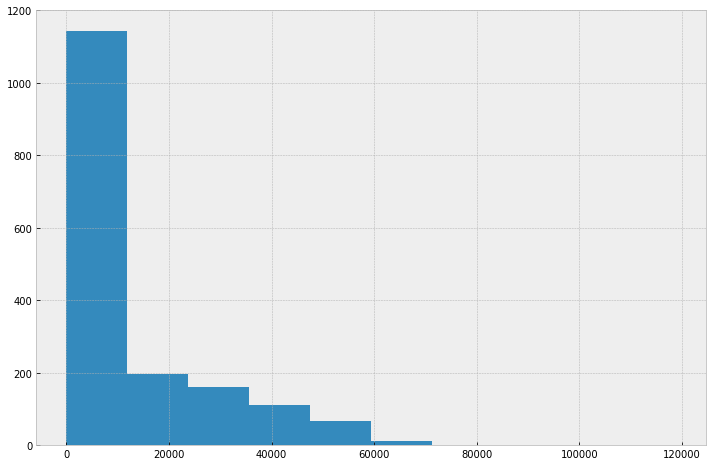

In [6]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams['figure.figsize'] = (12, 8)
plt.style.use('bmh')

df['Tuition of High School'].hist()

If your data is coming from an API or a SQL database, you need a couple more tools to get it into pandas.

## Second tool: SQL and `sqlalchemy`

With SQL, you need:
1. a database! :D
2. a query (e.g. `SELECT * FROM SOME_TABLE`)
3. a way to connect Python to the database!

We won't cover (1) and (2) today, but there are lots of ways to do (3). I use the [`sqlalchemy`](https://www.sqlalchemy.org/) library. But there are others ([lots](https://pypi.python.org/pypi?:action=search&term=sql)!), and many offer the same basic functionality - tomayto, tomahto.

In [8]:
from sqlalchemy import create_engine

sql_connection = engine = create_engine('sqlite:///data/greek.db')
sql_df = pd.read_sql('select * from duke', sql_connection)
sql_df.head()

,index,Greek Council,Greek Organization,Home City,Home State,Home Country,Latitude of Home City,Longitude of Home City,Free and reduced percentage of High School,Public or Private High School,Domestic or International High School,Boarding/Day High School,Religous High School?,Gender of High School's Students,Tuition of High School,Sports Team,Merit Scholarship
0,0,None,None,Accokeek,Maryland,United States,38.667617,-77.028309,Data not available,private,Domestic,Day,Episcopal,Co-Ed,36610.00,None,None
1,1,None,None,Advance,North Carolina,United States,35.941248,-80.409222,0.34741523,public,Domestic,Day,Unafilliated,Co-Ed,0.00,Fooball,None
2,2,None,None,Ajman,None,United Arab Emirates,25.509129,55.361907,None,private,International,Day,Unafilliated,Co-Ed,13093.46,None,None
3,3,None,None,Alameda,California,United States,37.609029,-121.899142,0.2268,public,Domestic,Day,Unafilliated,Co-Ed,0.00,None,None
4,4,None,None,Albuquerque,New Mexico,United States,35.084103,-106.650985,Data not available,private,Domestic,Day,Unafilliated,Co-Ed,22870.00,None,None


### Third tool: APIs and `requests` and Star Wars, oh my

Sometimes you want to grab data from the, ahem, "cloud". That is, the data isn't hosted on a database that you have access to, nor is it on any files that you can download. Nowadays, many organizations offer their data via an API. But what is an API?

An API is an [Application Programming Interface](https://en.wikipedia.org/wiki/Application_programming_interface). It's a structured way to share data across the web. Many websites will have (1) a user-facing front end and (2) an API. For example:

- [The New York Times](https://www.nytimes.com/) and [The New York Times API](https://developer.nytimes.com/)
- [Weather Underground](https://www.wunderground.com/) and the [Weather Underground API](https://www.wunderground.com/weather/api/).

Every API is a bit different. Meaning: read their docs! Some APIs are better documented than others. But the basic process is always the same: You access the data in an API by making an **HTTP request** to a specific **endpoint** (i.e. a URL). That endpoint normally sends the data back in `.json` format (though it might send it back as an `.xml`, or something else!).  Often you'll need to register your intent to use an API, and you'll be given an **API key** - this is a way for the API maintainers to "rate limit" users. That is, to prevent users from bombarding their API with millions of requests per day.

Since grabbing data from an API necessitates (1) talking over HTTP and (2) dealing with the `json` data format, we'll need a couple more tools: the `json` library (comes with the Python standard library) and [`requests`](http://docs.python-requests.org/en/master/).

Let's use a simple API - one that doesn't require an API key: the [Star Wars API](https://swapi.co/)!

#### First, we use the `requests` library to issue an HTTP `GET` request from the Star Wars API's `people` endpoint

In [16]:
import json
import requests

swapi_url = 'https://swapi.co/api/people/'
r = requests.get(swapi_url)
r.status_code

200

#### Success! HTTP requests always have [status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes) - "200" means "all OK!"

Now let's convert the HTTP response's into `json` and then, finally, into a `pandas` dataframe.

In [20]:
# Raw text
r.text[0:100]

'{"count":87,"next":"https://swapi.co/api/people/?page=2","previous":null,"results":[{"name":"Luke Sk'

In [22]:
# json
r.json()

{'count': 87,
 'next': 'https://swapi.co/api/people/?page=2',
 'previous': None,
 'results': [{'birth_year': '19BBY',
   'created': '2014-12-09T13:50:51.644000Z',
   'edited': '2014-12-20T21:17:56.891000Z',
   'eye_color': 'blue',
   'films': ['https://swapi.co/api/films/2/',
    'https://swapi.co/api/films/6/',
    'https://swapi.co/api/films/3/',
    'https://swapi.co/api/films/1/',
    'https://swapi.co/api/films/7/'],
   'gender': 'male',
   'hair_color': 'blond',
   'height': '172',
   'homeworld': 'https://swapi.co/api/planets/1/',
   'mass': '77',
   'name': 'Luke Skywalker',
   'skin_color': 'fair',
   'species': ['https://swapi.co/api/species/1/'],
   'starships': ['https://swapi.co/api/starships/12/',
    'https://swapi.co/api/starships/22/'],
   'url': 'https://swapi.co/api/people/1/',
   'vehicles': ['https://swapi.co/api/vehicles/14/',
    'https://swapi.co/api/vehicles/30/']},
  {'birth_year': '112BBY',
   'created': '2014-12-10T15:10:51.357000Z',
   'edited': '2014-12-20

In [26]:
# We just want the actual people, which can be found in the JSON's 'results' key
starwars_df = pd.DataFrame(r.json()['results'])
starwars_df.head()

,birth_year,created,edited,eye_color,films,gender,hair_color,height,homeworld,mass,name,skin_color,species,starships,url,vehicles
0,19BBY,2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,blue,"[https://swapi.co/api/films/2/, https://swapi....",male,blond,172,https://swapi.co/api/planets/1/,77,Luke Skywalker,fair,[https://swapi.co/api/species/1/],"[https://swapi.co/api/starships/12/, https://s...",https://swapi.co/api/people/1/,"[https://swapi.co/api/vehicles/14/, https://sw..."
1,112BBY,2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,yellow,"[https://swapi.co/api/films/2/, https://swapi....",n/a,n/a,167,https://swapi.co/api/planets/1/,75,C-3PO,gold,[https://swapi.co/api/species/2/],[],https://swapi.co/api/people/2/,[]
2,33BBY,2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,red,"[https://swapi.co/api/films/2/, https://swapi....",n/a,n/a,96,https://swapi.co/api/planets/8/,32,R2-D2,"white, blue",[https://swapi.co/api/species/2/],[],https://swapi.co/api/people/3/,[]
3,41.9BBY,2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,yellow,"[https://swapi.co/api/films/2/, https://swapi....",male,none,202,https://swapi.co/api/planets/1/,136,Darth Vader,white,[https://swapi.co/api/species/1/],[https://swapi.co/api/starships/13/],https://swapi.co/api/people/4/,[]
4,19BBY,2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,brown,"[https://swapi.co/api/films/2/, https://swapi....",female,brown,150,https://swapi.co/api/planets/2/,49,Leia Organa,light,[https://swapi.co/api/species/1/],[],https://swapi.co/api/people/5/,[https://swapi.co/api/vehicles/30/]


In [27]:
# Let's find my favorite character
starwars_df[starwars_df['name']=='Obi-Wan Kenobi']

,birth_year,created,edited,eye_color,films,gender,hair_color,height,homeworld,mass,name,skin_color,species,starships,url,vehicles
9,57BBY,2014-12-10T16:16:29.192000Z,2014-12-20T21:17:50.325000Z,blue-gray,"[https://swapi.co/api/films/2/, https://swapi....",male,"auburn, white",182,https://swapi.co/api/planets/20/,77,Obi-Wan Kenobi,fair,[https://swapi.co/api/species/1/],"[https://swapi.co/api/starships/48/, https://s...",https://swapi.co/api/people/10/,[https://swapi.co/api/vehicles/38/]


In [29]:
# What?! We know Obi-Wan's homeworld?
starwars_df[starwars_df['name']=='Obi-Wan Kenobi']['homeworld']

9    https://swapi.co/api/planets/20/
Name: homeworld, dtype: object

Obi-Wan's homeworld is a place called [_Stewjon_](http://starwars.wikia.com/wiki/Stewjon)?!

## So that's how you grab data

There's a _lot_ more to, for example, SQL querying or parsing HTTP responses, but those are the basics of how to get things into a `pandas` dataframe. Now, let's take a look at [cleaning and exploring the data](1_EDA.ipynb)!

## Recommended resources

#### Python
- [Udacity: Programming Foundations with Python](https://www.udacity.com/course/programming-foundations-with-python--ud036)
- many many many more...

#### Fun/interesting datasets
- [Data is plural](https://tinyletter.com/data-is-plural/archive)

#### `pandas`
- [Data School](https://www.youtube.com/user/dataschool)
- [Chris Albon tutorials](https://chrisalbon.com/#Python)

#### SQL
- [Udacity: Intro to relational databases](https://www.udacity.com/course/intro-to-relational-databases--ud197)

#### scikit-learn
- [scikit-learn tutorials](http://scikit-learn.org/stable/tutorial/index.html)
- YouTube!

#### statsmodels
- [Docs](http://www.statsmodels.org/stable/index.html)
- YouTube!

